# Import Statements

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_ue_2020 = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

# Read the Data

In [4]:
df_tesla = pd.read_csv("data/TESLA Search Trend vs Price.csv")

df_btc_search = pd.read_csv("data/Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("data/Daily Bitcoin Price.csv")

df_unemployment = pd.read_csv("data/UE Benefits Search vs UE Rate 2004-19.csv")

# Data Exploration

### Tesla

In [8]:
df_tesla.shape

(124, 3)

In [11]:
df_tesla["TSLA_WEB_SEARCH"].max()


31

In [12]:
df_tesla["TSLA_WEB_SEARCH"].min()

2

### Unemployment Data

In [14]:
df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()

100

In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ')

Largest value for "Unemployemnt Benefits" in Web Search: 


### Bitcoin

In [16]:
print(f'largest BTC News Search: ')
df_btc_search["BTC_NEWS_SEARCH"].max()

largest BTC News Search: 


100

# Data Cleaning

### Check for Missing Values

In [30]:
print(f"Missing values for Tesla?: {df_tesla.isna().values.sum()}")

Missing values for Tesla?: 0


In [31]:
print(f"Missing values for U/E?: {df_unemployment.isna().values.sum()}")

Missing values for U/E?: 0


In [26]:
print(f"Missing values for BTC Search?: {df_btc_search.isna().values.sum()}")

Missing values for BTC Search?: 0


### Convert Strings to DateTime Objects

In [60]:
type(df_tesla.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
type(df_btc_search.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
type(df_unemployment.MONTH[0])

pandas._libs.tslibs.timestamps.Timestamp

In [63]:
type(df_btc_price.DATE[0])

str

In [65]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [68]:
print(type(df_tesla.MONTH[0]))
print(type(df_unemployment.MONTH[0]))
print(type(df_btc_search.MONTH[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [67]:
print(type(df_btc_price.DATE[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [69]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [73]:
df_btc_monthly.shape

(73, 2)

In [74]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [88]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%y")

In [ ]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

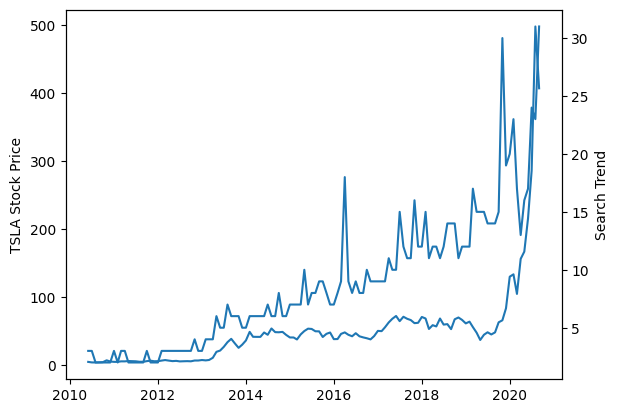

In [76]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price")
ax2.set_ylabel("Search Trend")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

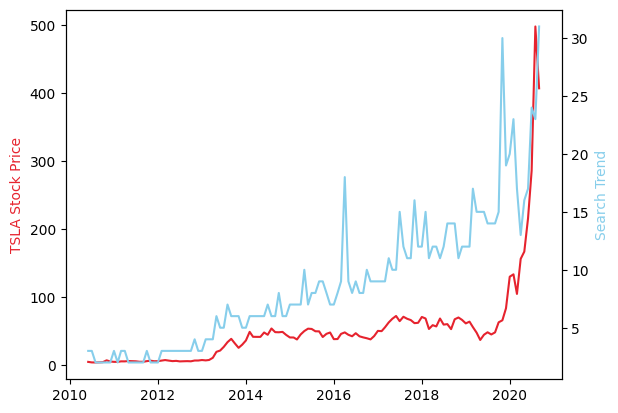

In [79]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="#E6232E")
ax2.set_ylabel("Search Trend", color="skyblue")

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#E6232E")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue")

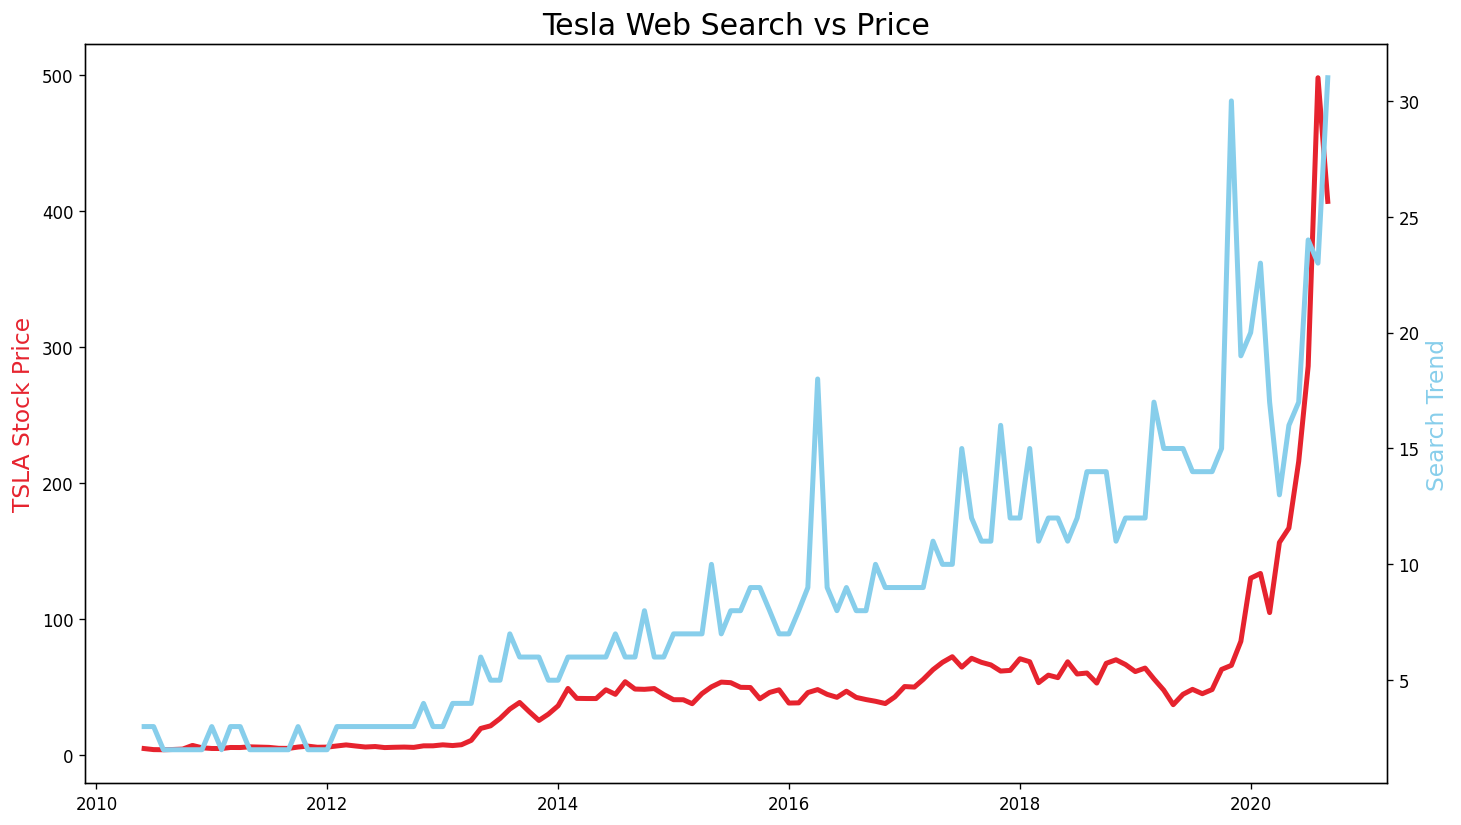

In [80]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="#E6232E", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#E6232E", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue", linewidth=3)

plt.show()

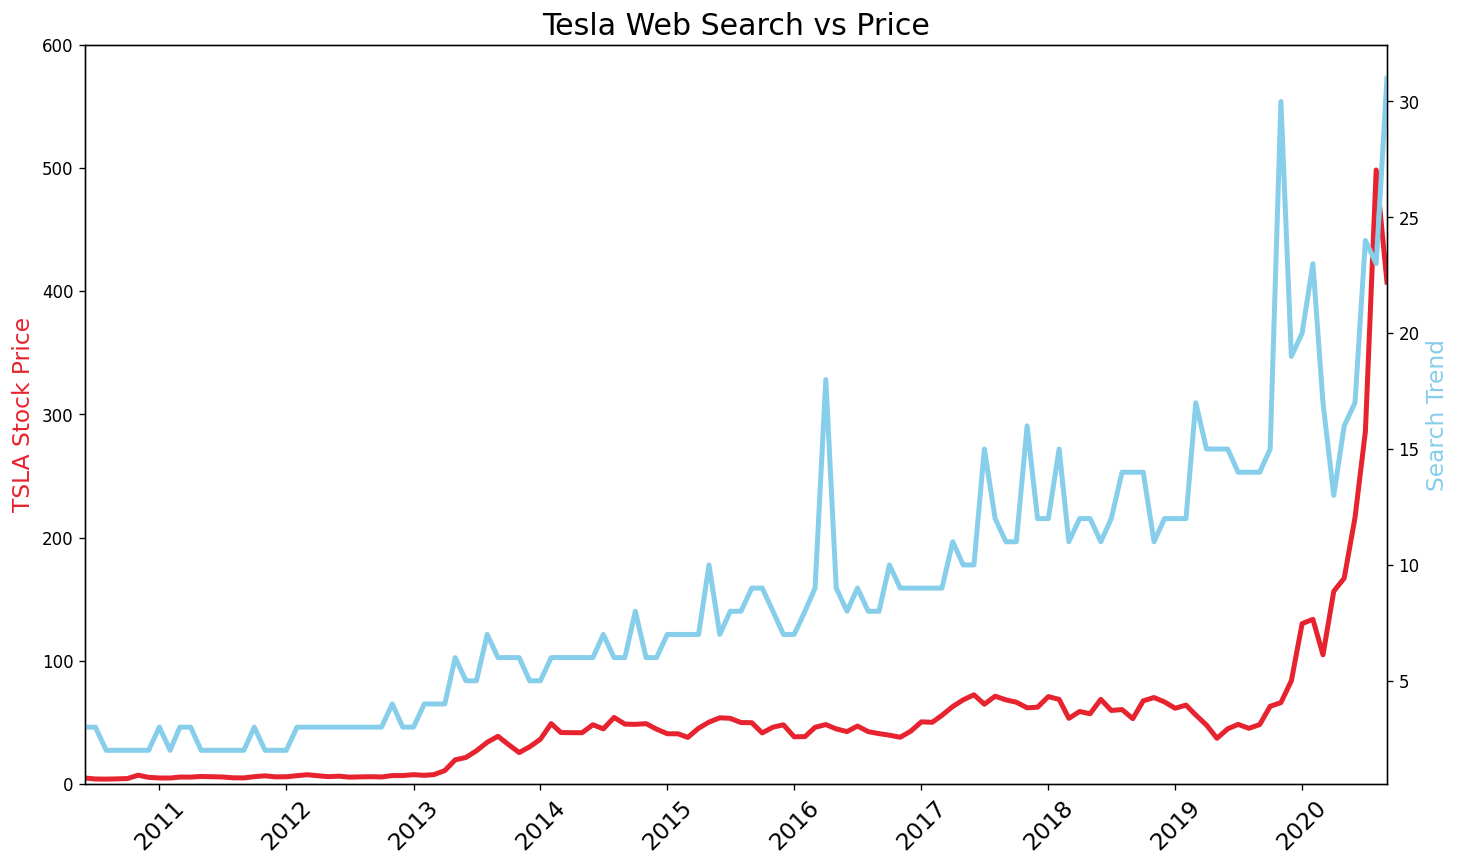

In [83]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="#E6232E", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#E6232E", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="skyblue", linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

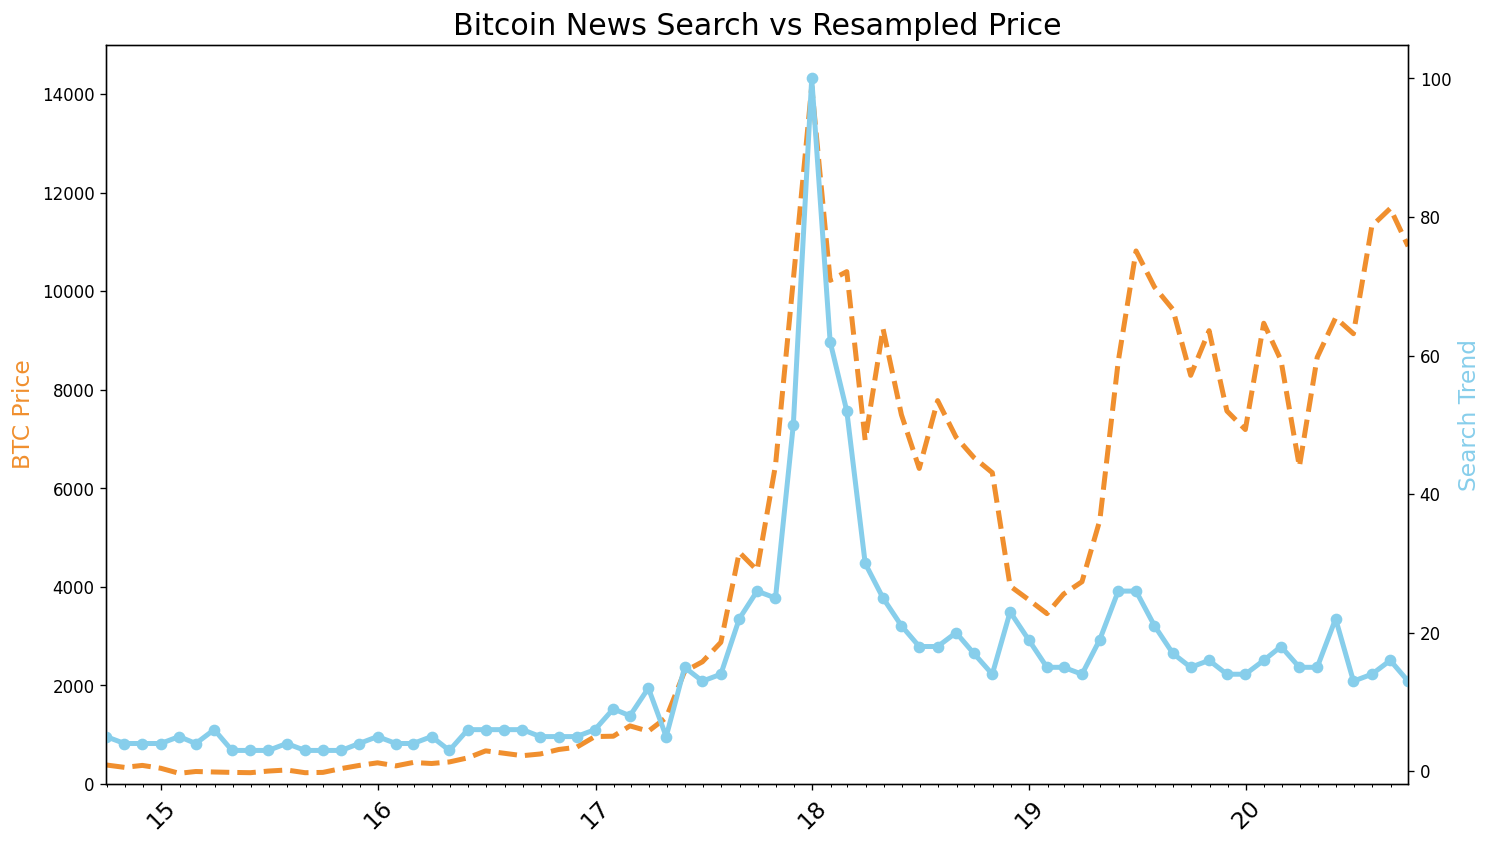

In [89]:
plt.figure(figsize=(14,8), dpi=120)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH,
         color='skyblue', linewidth=3, marker='o')

plt.show()

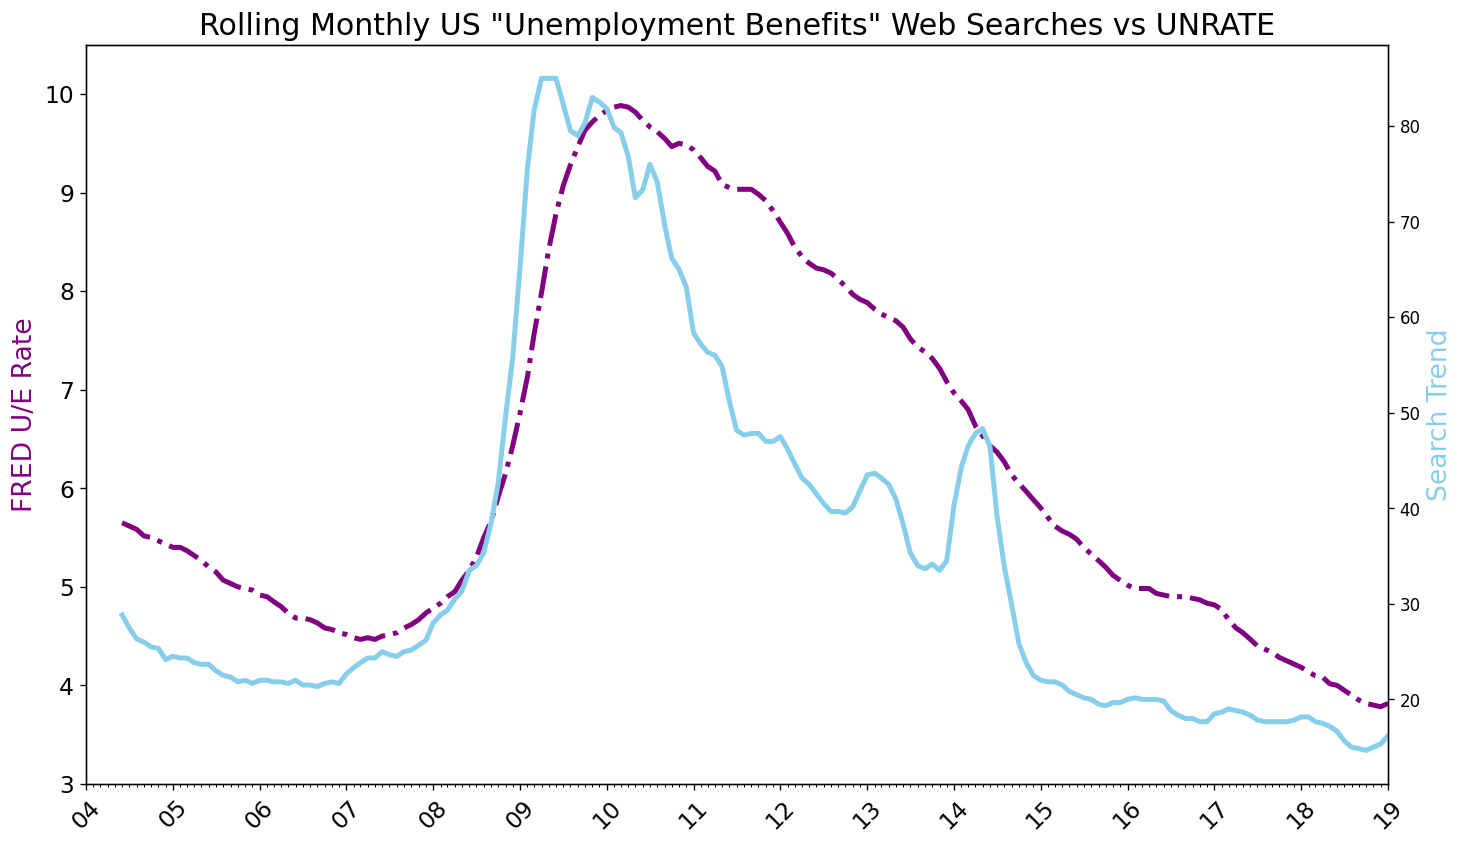

In [91]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

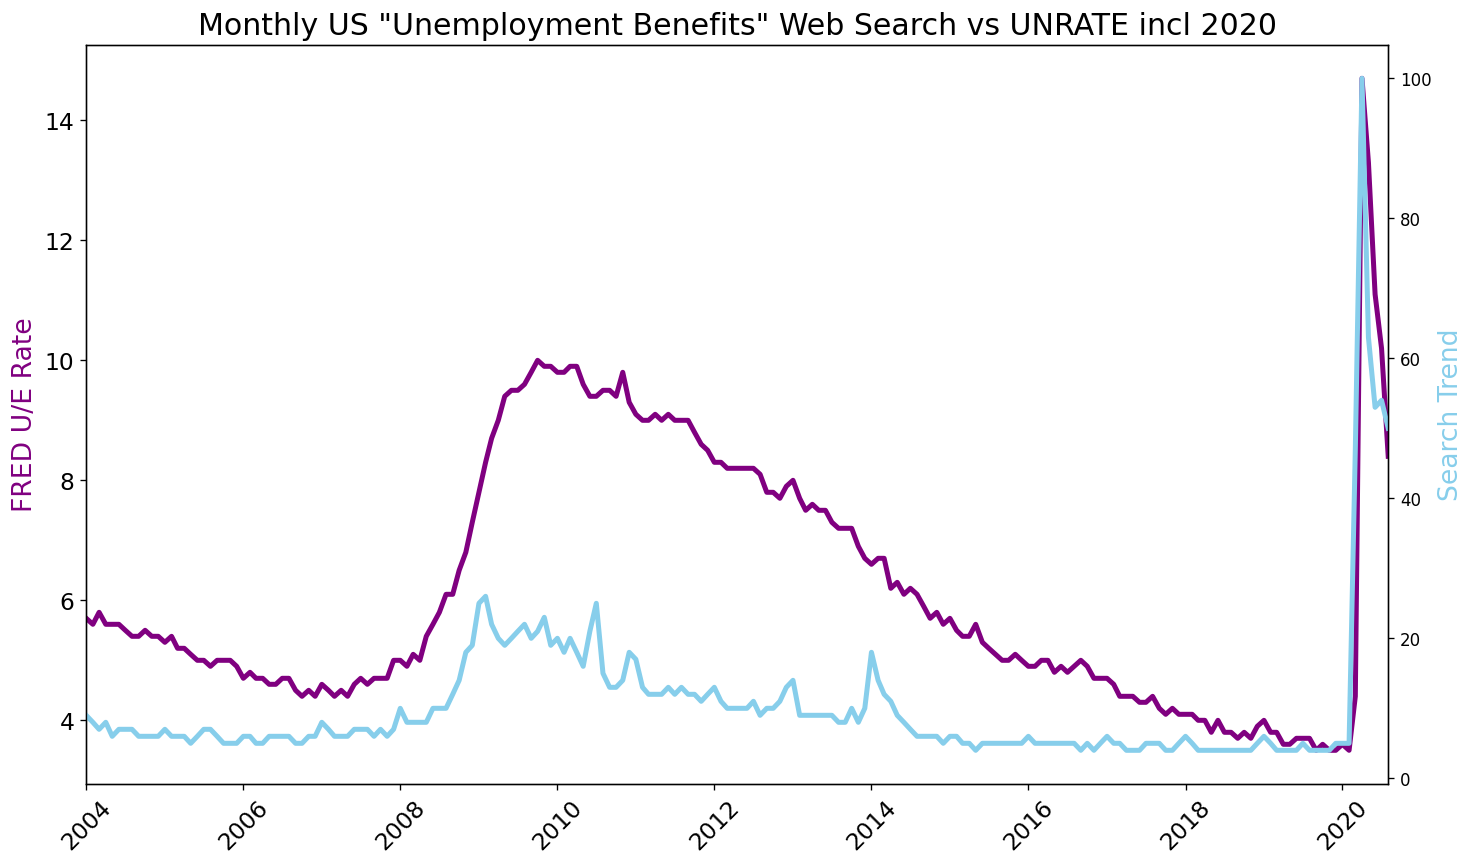

In [96]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()
